# New Book Adaptable Code tro generate plots

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
from matplotlib.legend_handler import HandlerBase

import os


import seaborn as sns
import sqlite3

### Set the folder paths for the data
### DATA FOLDER PATHS
data_folder = '../../data/' # ROSTER DATA & GAME STATS
## IMAGES FOLDER PATHS
logo_folder = '../../images/logos/' 
background_folder = '../../images/backgrounds/'

# Roster Data Paths
roster_path_current = 'rosters/2023_master_roster.csv'
roster_path_previous = 'rosters/2022_master_roster.csv'
# Once the Database Clean and Transform code is updated to insert the roster, we can use the data from the database

# Game Stats Database Path
df_folder = '../../data/'
db_path = 'YTD_Game_Stats_Cleaned.db'

### Load the Data
- Current and Previous year's Roster
- Game Details Database for current year

In [2]:
## Load rosters into dataframes
df_current = pd.read_csv(data_folder + roster_path_current)
df_previous = pd.read_csv(data_folder + roster_path_previous)

## Connect to the Database
conn = sqlite3.connect(df_folder + db_path)


## HOTFIX#####
# Replace dashes with spaces in the School column of the roster dataframes
df_current['School'] = df_current['School'].str.replace('-', ' ')
df_previous['School'] = df_previous['School'].str.replace('-', ' ')

#### UNCHECK TO CHECK DATABASE CONTENTS
# ## List the tables in the database
# tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
# print(tables)


# Set Parameters for the charts
- Team Names
- Team Logos
- Background Image
- Transparentcy of the background
- Figure Size
- Font Styles
    - Once I nail down a style I am happy with I want to store this in a seperate file and import


In [3]:
## Set paramaeters

### Set Matchup Tag - This will be used as a folder name to save the charts
matchup_tag = 'MSU_OSU_1' #

## Teams to Highlight - Use dashes instead of spaces
team_1 = 'Michigan State' # 
team_1_abrv = 'MSU' #
team_2 = 'Ohio State' #
team_2_abrv = 'OSU' #

## Path to School Logos
team_1_logo =  'msu.png' #
team_2_logo =  'osu.png' #
team_logos = {team_1: logo_folder + team_1_logo, team_2: logo_folder + team_2_logo}

## Set Colors
team_1_color =  'darkgreen' # For Michigan State
team_2_color =  'darkred' # For Ohio State
team_colors = {team_1: team_1_color, team_2: team_2_color}
############ Eventaully want to create a dictionary of colors for each team and save in a file to import

team_abrv_mapping = {
    'Michigan State': 'MSU',
    'Ohio State': 'OSU'
}


### Create a disctionary called highlight_colors to store the colors for each team
### Do it this way so i can reuse code from MSU_Explore_and_Plot notebook
highlight_colors = {team_1_abrv: team_1_color, team_2_abrv: team_2_color}

#### Set Background Image
path_to_bg_image =  'msu_osu_1.png' #
alpha_value = 0.1 # Set the transparency of the background image
## Load the background image
bg_img = mpimg.imread(background_folder + path_to_bg_image)



# Adjust the default chart size and aspect ratio
### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (12, 8) # Original
fig_deafult_2 = (12, 10)
# Turn on/off the figure size by commenting/uncommenting the lines below
# figure_size = fig_deafult_1
figure_size = fig_deafult_2


################################
## FONT PARAMETERES
font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 36}
font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}
font_label_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 20}
font_tick_large_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 16}
#################################





## HELPER FUNCTIONS

In [4]:
    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

# Physical Comparison Charts
- Compound box and whisker plots of Height & Weight both by Position and Class Rank

In [5]:
df_current.head()

Unnamed: 0  No.             Name Yr.   Ht.  Wt.         DOB  \
0         NaN   23   Angesved, Theo  Fr  5-10  172   6/23/2003   
1         NaN    4  Callahan, Brett  Gr  5-10  182  10/16/1998   
2         NaN    7    Kramer, Brian  Sr  5-11  181   7/20/2000   
3         NaN    5   Leppanen, Tomi  Fr   6-1  190    4/7/2003   
4         NaN   20  McCurdy, Hunter  So   6-1  220    8/9/2001   

           Hometown    Position  Height_Inches  Draft_Year NHL_Team  D_Round  \
0     Växjö, Sweden  Defensemen             70         NaN      NaN      NaN   
1    Westmont, Ill.  Defensemen             70         NaN      NaN      NaN   
2      Wexford, Pa.  Defensemen             71         NaN      NaN      NaN   
3  Heinola, Finland  Defensemen             73         NaN      NaN      NaN   
4      Mokena, Ill.  Defensemen             73         NaN      NaN      NaN   

         Last Team League         School  
0  Frölunda HC J20    SWE  American Intl  
1    Jersey Hitmen  USPHL  American Intl  
2            Fargo   USHL  American Intl  
3       Sioux City   USHL  American Intl  
4          Danbury   NAHL  American Intl

In [6]:
# # Create a filtered dataframe for Two Schools We want to highlight
df_filtered = df_current[(df_current['School'] == team_1) | (df_current['School'] == team_2)]

print(df_filtered.head())


     Unnamed: 0  No.              Name Yr.  Ht.  Wt.         DOB  \
736         NaN    8  Brickey, Scooter  Gr  6-4  215   5/27/1999   
737         NaN   93  Carfagna, Damien  So  6-0  185  12/12/2002   
738         NaN    7    Johnson, Brent  Jr  6-0  185   3/20/2003   
739         NaN    6       Klee, Mason  Gr  6-2  195   10/4/1999   
740         NaN    4      Larkin, John  So  6-2  190   1/26/2001   

               Hometown    Position  Height_Inches  Draft_Year NHL_Team  \
736  Burtchville, Mich.  Defensemen             76         NaN      NaN   
737    Wood Ridge, N.J.  Defensemen             72         NaN      NaN   
738       Dallas, Texas  Defensemen             72      2021.0      WSH   
739     Morrison, Colo.  Defensemen             74         NaN      NaN   
740      Detroit, Mich.  Defensemen             74         NaN      NaN   

     D_Round      Last Team League      School  
736      NaN     Des Moines   USHL  Ohio State  
737      NaN  New Hampshire    HEA  Ohio S

In [7]:
### Set the Output Folder for the images
TEMP_FOLDER = f'../../TEMP/images/{matchup_tag}/'

# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

# Set the order of Class Rank
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# # Create a filtered dataframe for Two Schools We want to highlight
df_filtered = df_current[(df_current['School'] == team_1) | (df_current['School'] == team_2)]


########### Create the Plots ###########
def generate_plot(x_col, y_col, title, x_order, y_label, df, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER):
    
    # Create subplot
    fig, ax = plt.subplots(1, 1, figsize=figure_size)
    
    # Set Axis ranges
    ax.set_xlim([0, len(x_order)])

    # Background Image
    x_range = ax.get_xlim()
    y_min = df[y_col].min()
    y_max = df[y_col].max()
    ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=0.1, zorder=0)

    # Plots
    sns.boxplot(x=x_col, y=y_col, data=df, color='lightgrey', showfliers=False, ax=ax, order=x_order)
    sns.swarmplot(x=x_col, y=y_col, data=df, color='grey', alpha=0.5, ax=ax, order=x_order)
    sns.boxplot(x=x_col, y=y_col, data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=x_order, width=0.65, linewidth=3)

    # Titles and Labels
    ax.set_title(title, fontdict=font_title_param)
    ax.set_ylabel(y_label, fontdict=font_label_param)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)
    ax.set_xlabel('')

    ########## Conver the tick marks to feet and inches in the Height Plots ##########
    # Check if y_col is for height and then apply the conversion
    if y_col == 'Height_Inches':
        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)
    else:
        ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

    
    # Get upper bounds of the axis
    x_max = ax.get_xlim()[1]
    y_max = ax.get_ylim()[1]

    # Define a function to place logos at given coordinates
    def place_logo(image_path, xy, ax, zoom=0.3):
        img = plt.imread(image_path)
        imagebox = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0, xycoords='axes fraction', boxcoords="axes fraction")
        ax.add_artist(ab)

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner


    # # # Drop Legend if there is any
    if ax.get_legend() is not None:
        ax.get_legend().remove()


    plt.tight_layout()
    save_path = f'{TEMP_FOLDER}'
    os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
    # Save Plot
    plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    
    plt.show()

# # Weight by Class Rank:
# generate_plot('Yr.', 'Wt.', 'Weight by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Class Rank:
# generate_plot('Yr.', 'Height_Inches', 'Height by Class Year', ['Fr', 'So', 'Jr', 'Sr', 'Gr'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Weight by Position:
# generate_plot('Position', 'Wt.', 'Weight by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'LBs', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)

# # Height by Position:
# generate_plot('Position', 'Height_Inches', 'Height by Position', ['Forwards', 'Defensemen', 'Goaltenders'], 'Height', df_current, df_filtered, team_colors, bg_img, figure_size, font_title_param, font_label_param, font_tick_param, TEMP_FOLDER)



# Statistical Plots
- Scatter plots for Goals, Assist, PIMs and Shots

- 

## Helper Functions

In [8]:

# Function to plot logos
def plot_logo(image, x, y, ax, zoom=0.15, zorder=100):
    img = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(img, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0, box_alignment=(0.5, 0.5), zorder=zorder)
    ax.add_artist(ab)

# Function to add logos to any plot
def add_logos_to_plot(df, x_col, y_col, team_colors, logo_mapping, ax):
        
    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = df[df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = df[df['Team'] == team_abrv_mapping[team]]
        
        if not team_data.empty:
            x, y = team_data[x_col].values[0], team_data[y_col].values[0]
            
            if team in logo_mapping:
                logo_img = mpimg.imread(logo_folder + logo_mapping[team])
                plot_logo(logo_img, x, y, ax)
            else:
                plt.scatter(x, y, color=color, s=100, zorder=5, marker='x')
        else:
            print(f"No data found for team {team}")


# Dictionary to map team names to their logo filenames
logo_mapping = {
    'Michigan State': 'msu.png',
    'Ohio State': 'osu.png'
}

### Query Definitions to be usesd in plots below

In [9]:
# Query to get the average goals scored and allowed per game for each team
avg_goals_query = """
SELECT
    a.Team,
    AVG(a.goalsT) AS Avg_Goals_Scored,
    AVG(b.goalsT) AS Avg_Goals_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


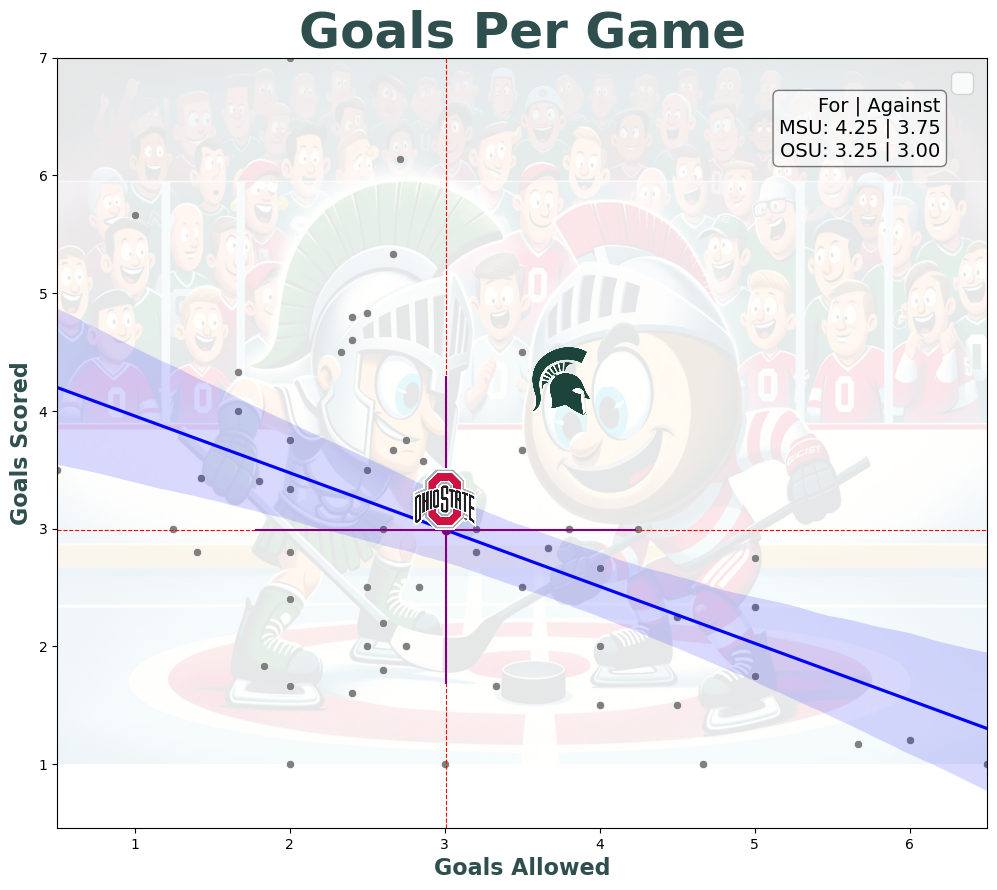

In [10]:

# Execute the query and store the results in a DataFrame
avg_goals_df = pd.read_sql(avg_goals_query, conn)

# Calculate average and standard deviation for "Goals Scored" and "Goals Allowed"
avg_goals_scored = avg_goals_df['Avg_Goals_Scored'].mean()
std_goals_scored = avg_goals_df['Avg_Goals_Scored'].std()
avg_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].mean()
std_goals_allowed = avg_goals_df['Avg_Goals_Allowed'].std()


# Create the scatter plot with trend line, average, and standard deviation
fig, ax = plt.subplots(figsize=figure_size)  # Create a figure and a set of subplots, and get the Axes object.



# Set the background image
# You might need to adjust the extent based on your data's min and max values
plt.imshow(bg_img, aspect='auto', extent=[avg_goals_df['Avg_Goals_Allowed'].min(), 
                                          avg_goals_df['Avg_Goals_Allowed'].max(), 
                                          avg_goals_df['Avg_Goals_Scored'].min(), 
                                          avg_goals_df['Avg_Goals_Scored'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)



# Scatter plot
sns.scatterplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', color='grey')

# Add trend line
sns.regplot(data=avg_goals_df, x='Avg_Goals_Allowed', y='Avg_Goals_Scored', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_goals_scored, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_goals_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_goals_allowed, avg_goals_scored, xerr=std_goals_allowed, yerr=std_goals_scored, color='purple', fmt='o')

# Highlight specific teams
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], color=color, s=100, zorder=5, marker='x')

plt.scatter(team_data['Avg_Goals_Allowed'], team_data['Avg_Goals_Scored'], c='red', s=100, marker='o', zorder=99)


# Add logos (assuming the function supports the swap)
add_logos_to_plot(avg_goals_df, 'Avg_Goals_Allowed', 'Avg_Goals_Scored', team_colors, logo_mapping, ax=ax)



###########################
# Add a legend-like floating box in the upper right
# Create a multi-line summary text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_goals_df[avg_goals_df['Team'] == team]
    summary_text += f'{team}: {team_data["Avg_Goals_Scored"].values[0]:.2f} | {team_data["Avg_Goals_Allowed"].values[0]:.2f}\n'

# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Goals Per Game', font_title_param)
plt.xlabel('Goals Allowed', font_label_param)
plt.ylabel('Goals Scored', font_label_param)

# Upsize the Legend Text
plt.legend(fontsize=20)

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)

plt.show()

## Average Shots Per Game (for and Against)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


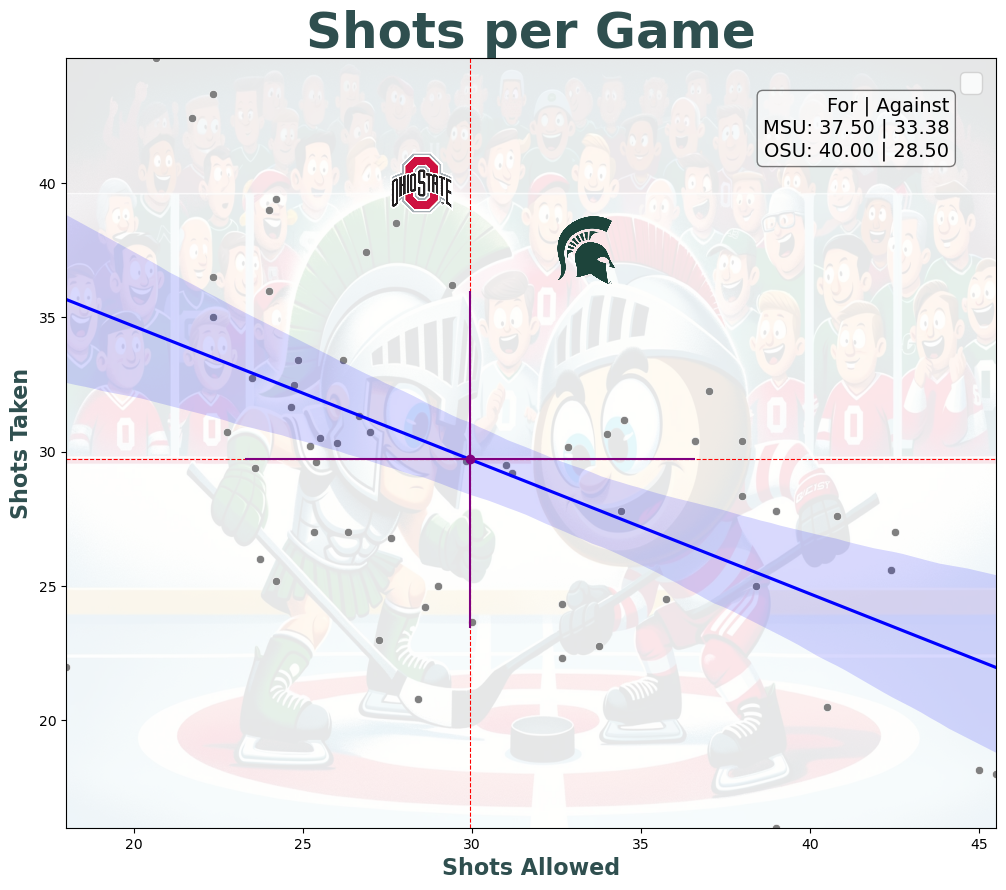

In [11]:
# Query to get the average shots taken and allowed per game for each team using the previous database connection
avg_shots_query = """
SELECT
    a.Team,
    AVG(a.shotsT) AS Avg_Shots_Taken,
    AVG(b.shotsT) AS Avg_Shots_Allowed
FROM linescore AS a
JOIN linescore AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
GROUP BY a.Team;
"""

# Execute the query and store the results in a DataFrame
avg_shots_df = pd.read_sql(avg_shots_query, conn)

# Calculate average and standard deviation for "Shots Taken" and "Shots Allowed"
avg_shots_taken = avg_shots_df['Avg_Shots_Taken'].mean()
std_shots_taken = avg_shots_df['Avg_Shots_Taken'].std()
avg_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].mean()
std_shots_allowed = avg_shots_df['Avg_Shots_Allowed'].std()

# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)

# Set the background image
plt.imshow(bg_img, aspect='auto', extent=[avg_shots_df['Avg_Shots_Allowed'].min(), 
                                          avg_shots_df['Avg_Shots_Allowed'].max(), 
                                          avg_shots_df['Avg_Shots_Taken'].min(), 
                                          avg_shots_df['Avg_Shots_Taken'].max()], 
           zorder=0, alpha=alpha_value)


# Scatter plot
sns.scatterplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', color='grey')

# Add trend line
sns.regplot(data=avg_shots_df, x='Avg_Shots_Allowed', y='Avg_Shots_Taken', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_shots_taken, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_shots_allowed, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_shots_allowed, avg_shots_taken, xerr=std_shots_allowed, yerr=std_shots_taken, color='purple', fmt='o')



# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        plt.scatter(team_data['Avg_Shots_Allowed'], team_data['Avg_Shots_Taken'], color=color, s=100, zorder=5, marker='x', label=f"{team}")


# Add logos
add_logos_to_plot(avg_shots_df, 'Avg_Shots_Allowed', 'Avg_Shots_Taken', team_colors, logo_mapping, ax=ax)

# Add a legend-like floating box in the upper right
# Create a multi-line summary text

# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_shots_df[avg_shots_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Shots_Taken"].values[0]:.2f} | {team_data["Avg_Shots_Allowed"].values[0]:.2f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))


# Add title and axis labels
plt.title('Shots per Game', font_title_param)
plt.xlabel('Shots Allowed', font_label_param)
plt.ylabel('Shots Taken', font_label_param)

# Upsize the Legend Text
plt.legend(fontsize=20)


save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
plt.show()


## Average Penelty Minutes (PIM) per Game

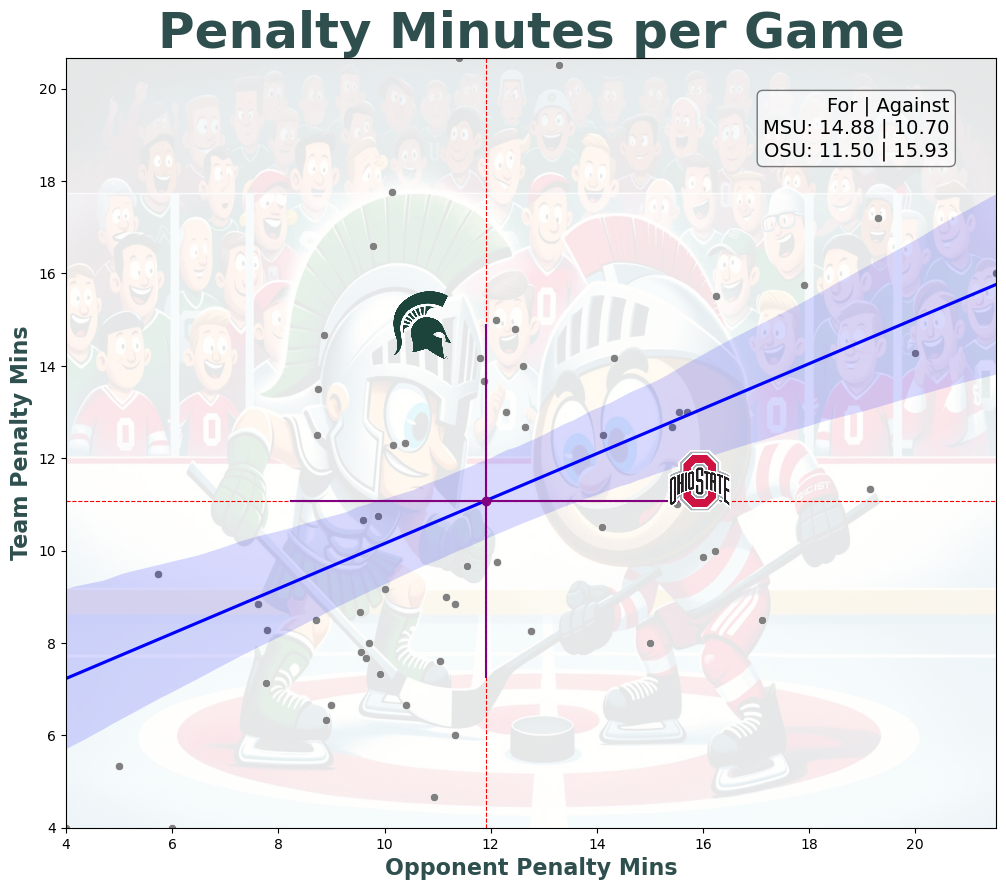

In [12]:
# SQL query to calculate the average penalty minutes "for" and "against" each team
avg_penalty_for_against_query = """
WITH PenaltyFor AS (
    SELECT
        Team,
        AVG(Total_Penalty_Minutes) AS Avg_Penalty_Minutes_For
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    )
    GROUP BY Team
),
PenaltyAgainst AS (
    SELECT
        b.Team,
        AVG(a.Total_Penalty_Minutes) AS Avg_Penalty_Minutes_Against
    FROM (
        SELECT
            Team,
            Game_ID,
            SUM(Pen_Length) AS Total_Penalty_Minutes
        FROM penalty_summary
        GROUP BY Team, Game_ID
    ) AS a
    JOIN penalty_summary AS b ON a.Game_ID = b.Game_ID AND a.Team != b.Team
    GROUP BY b.Team
)
SELECT
    a.Team,
    a.Avg_Penalty_Minutes_For,
    b.Avg_Penalty_Minutes_Against
FROM PenaltyFor AS a
JOIN PenaltyAgainst AS b ON a.Team = b.Team;
"""

# Execute the query and store the results in a DataFrame
avg_penalty_for_against_df = pd.read_sql(avg_penalty_for_against_query, conn)
# avg_penalty_for_against_df.head()

# Calculate average and standard deviation for "For" and "Against"
avg_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].mean()
std_for = avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].std()
avg_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].mean()
std_against = avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].std()

#####################################################
# Create the scatter plot
fig, ax = plt.subplots(figsize=figure_size)  # Create figure and axis object

# Scatter plot
sns.scatterplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', color='grey', ax=ax)


# Add Background Image
plt.imshow(bg_img, aspect='auto', extent=[avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_Against'].max(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].min(), 
                                          avg_penalty_for_against_df['Avg_Penalty_Minutes_For'].max()], 
                                          zorder=0, 
                                          alpha=alpha_value)

# Add trend line
sns.regplot(data=avg_penalty_for_against_df, x='Avg_Penalty_Minutes_Against', y='Avg_Penalty_Minutes_For', scatter=False, color='blue')

# Add average lines
plt.axhline(y=avg_for, color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=avg_against, color='red', linestyle='--', linewidth=0.8)

# Add standard deviation lines
plt.errorbar(avg_against, avg_for, xerr=std_against, yerr=std_for, color='purple', fmt='o')

# Highlight specific teams
for team, color in team_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    plt.scatter(team_data['Avg_Penalty_Minutes_Against'], team_data['Avg_Penalty_Minutes_For'], color=color, s=100, zorder=5, marker='x')


# Update summary_text
summary_text = 'For | Against\n'
for team, color in highlight_colors.items():
    team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
    if not team_data.empty:
        summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f} | {team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'
    else:
        print(f"No data found for team {team}")


# Add the cohesive summary box
plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=14, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# # Create a multi-line summary text
# summary_text = 'Penalty Mins For/Against\n'
# for team, color in team_colors.items():
#     team_data = avg_penalty_for_against_df[avg_penalty_for_against_df['Team'] == team]
#     summary_text += f'{team}: {team_data["Avg_Penalty_Minutes_For"].values[0]:.2f}/{team_data["Avg_Penalty_Minutes_Against"].values[0]:.2f}\n'

# # Add the cohesive summary box
# plt.gcf().text(0.95, 0.95, summary_text.rstrip(), transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

# Add title and axis labels
plt.title('Penalty Minutes per Game', font_title_param)
plt.xlabel('Opponent Penalty Mins', font_label_param)
plt.ylabel('Team Penalty Mins', font_label_param)

# Add logos
add_logos_to_plot(avg_penalty_for_against_df, 'Avg_Penalty_Minutes_Against', 'Avg_Penalty_Minutes_For', team_colors, logo_mapping, ax=ax)

save_path = f'{TEMP_FOLDER}'
os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist

## Get the string of the title and replace spaces with underscores
title = plt.gca().get_title().replace(' ', '_')

# Save Plot
plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
plt.show()





## Histogram of When Goals are Scored

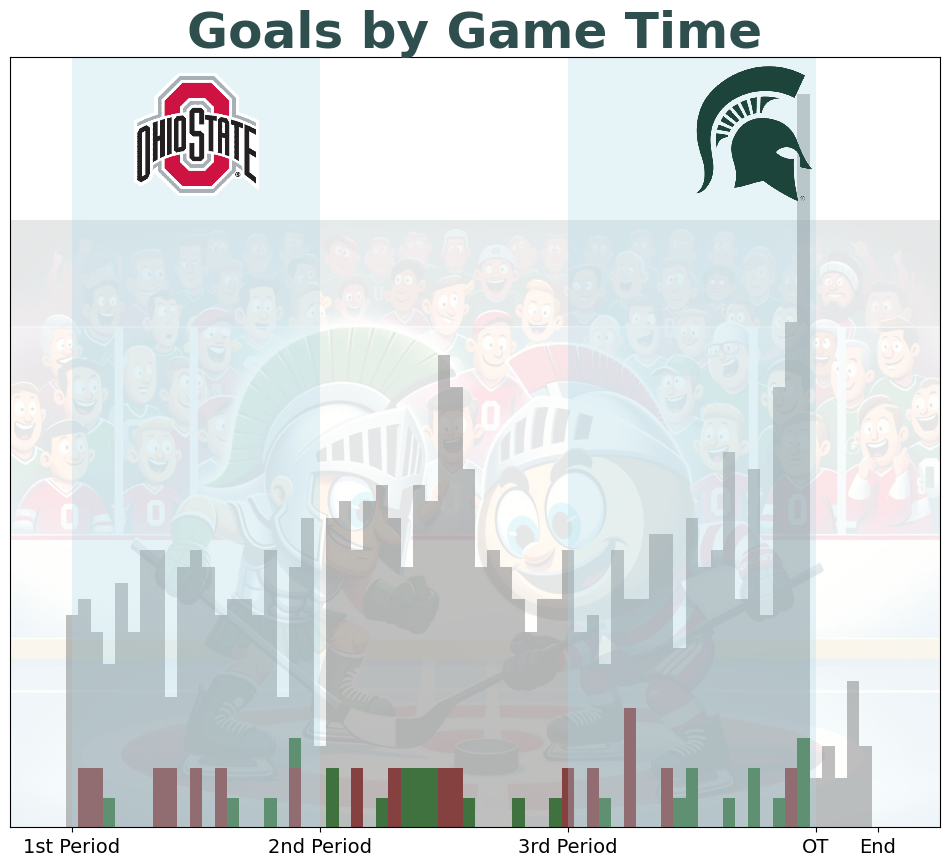

In [13]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def fetch_goals_time_data(conn):
    goals_time_query = """
    SELECT Team, Period, Time
    FROM scoring_summary;
    """
    return pd.read_sql(goals_time_query, conn)

def convert_to_continuous_time(row):
    period = row['Period']
    time = row['Time']
    minutes, seconds = map(int, time.split(':'))
    
    if period == '1st Period':
        offset = 0
    elif period == '2nd Period':
        offset = 20
    elif period == '3rd Period':
        offset = 40
    else:
        offset = 60
        
    return offset + minutes + seconds / 60.0

def plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value):
    goals_time_df['Continuous_Time'] = goals_time_df.apply(convert_to_continuous_time, axis=1)
    
    fig, ax = plt.subplots(figsize=figure_size)
    ax.imshow(bg_img, aspect='auto', extent=[-5, 70, 0, .6], zorder=0, alpha=alpha_value)

    all_teams_data = goals_time_df['Continuous_Time']
    bin_counts, bin_edges = np.histogram(all_teams_data, bins=range(0, 66))
    bin_avgs = bin_counts / len(np.unique(goals_time_df['Team']))

    # Moved this part below to plot it after the specific teams
    # ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    for team, color in team_colors.items():
        # Try to find the team data using the full name first
        team_data = goals_time_df[goals_time_df['Team'] == team]
        
        # If not found, try using the abbreviation
        if team_data.empty and team in team_abrv_mapping:
            team_data = goals_time_df[goals_time_df['Team'] == team_abrv_mapping[team]]
            
        if not team_data.empty:
            team_bin_counts, _ = np.histogram(team_data['Continuous_Time'], bins=range(0, 66))
            team_bin_avgs = team_bin_counts / len(team_data)  # Normalize by the number of goals by the team
            ax.bar(bin_edges[:-1], team_bin_avgs, width=1, alpha=1, label=f"{team} (Avg)", color=color)
        else:
            print(f"No data found for team {team}")


    ax.bar(bin_edges[:-1], bin_avgs, width=1, alpha=0.5, label='All Teams (Avg)', color='grey')

    

    
    ax.axvspan(0, 20, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(20, 40, facecolor='lightgreen', alpha=0.3)
    ax.axvspan(40, 60, facecolor='lightblue', alpha=0.3)
    # ax.axvspan(60, 65, facecolor='lightyellow', alpha=0.3)
    
    ax.set_title('Goals by Game Time', font_title_param)
    ax.set_xticks([0, 20, 40, 60, 65])
    ax.set_xticklabels(['1st Period', '2nd Period', '3rd Period', 'OT', 'End'], fontsize=14)
    ax.yaxis.set_major_locator(ticker.NullLocator())

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.80, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.20, 0.90), ax)  # Upper right corner
    
    save_path = f'{TEMP_FOLDER}'
    os.makedirs(save_path, exist_ok=True)  # Create directory if doesn't exist
    
    ## Get the string of the title and replace spaces with underscores
    title = plt.gca().get_title().replace(' ', '_')

    # Save Plot
    plt.savefig(f'{save_path}{title}.png', bbox_inches='tight', dpi=300)
    plt.show()

# Usage
# conn = "your_database_connection_here"
# highlight_colors_shots = {"Team1": "red", "Team2": "blue"}  # Replace with actual team-color mapping
# figure_size = (12, 8)
# bg_img = "your_background_image_here"
# alpha_val = 0.5  # Adjust the alpha value as needed

goals_time_df = fetch_goals_time_data(conn)
plot_goals_distribution(goals_time_df, team_colors, figure_size, bg_img, alpha_value)


# Stats By Class Ranking

In [14]:
away_games_df = pd.read_sql("""
SELECT 
    Away_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Away
FROM game_details
GROUP BY Away_Team;
""", conn)

home_games_df = pd.read_sql("""
SELECT 
    Home_Team AS Team, 
    COUNT(DISTINCT Game_ID) AS Num_Games_Home
FROM game_details
GROUP BY Home_Team;
""", conn)


games_played_count = pd.merge(away_games_df, home_games_df, how='outer', on='Team')
games_played_count['Num_Games'] = games_played_count['Num_Games_Away'].fillna(0) + games_played_count['Num_Games_Home'].fillna(0)
games_played_count = games_played_count[['Team', 'Num_Games']]

games_played_count.tail()



Team  Num_Games
57         Duluth        3.0
58         Lowell        5.0
59  New Hampshire        5.0
60   North Dakota        6.0
61          Omaha        4.0

In [15]:
class_rank_stats_df = pd.read_sql("""
SELECT
    mr.`Yr.`,
    ps.Team,
    SUM(ps.G) AS Total_Goals,
    SUM(ps.A) AS Total_Assists,
    SUM(ps.Sh) AS Total_Shots,
    SUM(ps.G) + SUM(ps.A) AS Total_Points,
    SUM(ps.PIM) AS Total_PIM
    
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.`Yr.`, ps.Team
ORDER BY mr.`Yr.`, ps.Team;
""", conn)



final_df = pd.merge(class_rank_stats_df, games_played_count, how='left', on='Team')
# # # ## Calculate the average stats per class
final_df['AVG_Goals'] = final_df['Total_Goals'] / final_df['Num_Games']
final_df['AVG_Assists'] = final_df['Total_Assists'] / final_df['Num_Games']
final_df['AVG_Points'] = final_df['Total_Points'] / final_df['Num_Games']
final_df['AVG_PIM'] = final_df['Total_PIM'] / final_df['Num_Games']
final_df['AVG_Shots'] = final_df['Total_Shots'] / final_df['Num_Games']


final_df.head(20)

##### Create the filtered dataframe for the two teams we want to highlight
final_df_filtered = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2)]






## Descriptive Stats
# final_df.tail()

## Look at rows with Gr (Graduate) as the class rank
# final_df = final_df[final_df['Yr.'] == 'Gr']

# Filter to just Michigan State and Ohio State
# final_df = final_df[(final_df['Team'] == team_1) | (final_df['Team'] == team_2)]

## Descriptive Stats
final_df.tail(20)
# final_df_filtered.tail()


Yr.               Team  Total_Goals  Total_Assists  Total_Shots  \
229  Sr       Northeastern          4.0            3.0         17.0   
230  Sr  Northern Michigan          0.0            1.0          9.0   
231  Sr         Notre Dame          2.0            8.0         45.0   
232  Sr         Ohio State          4.0            5.0         52.0   
233  Sr              Omaha          3.0            1.0         21.0   
234  Sr         Penn State          3.0            6.0         23.0   
235  Sr         Providence          4.0           15.0         46.0   
236  Sr         Quinnipiac          2.0            9.0         22.0   
237  Sr                RIT          0.0            1.0         14.0   
238  Sr         Rensselaer          2.0            1.0          8.0   
239  Sr      Robert Morris          2.0            4.0         46.0   
240  Sr       Sacred Heart          7.0           11.0         40.0   
241  Sr    St. Cloud State          4.0            7.0         49.0   
242  Sr       St. Lawrence          1.0            2.0         25.0   
243  Sr         St. Thomas          3.0            6.0         54.0   
244  Sr          Stonehill          0.0            0.0          1.0   
245  Sr            Vermont          1.0            1.0          9.0   
246  Sr   Western Michigan          6.0            3.0         31.0   
247  Sr          Wisconsin          3.0            3.0         13.0   
248  Sr               Yale          0.0            0.0          1.0   

     Total_Points  Total_PIM  Num_Games  AVG_Goals  AVG_Assists  AVG_Points  \
229           7.0        4.0        4.0   1.000000     0.750000    1.750000   
230           1.0        6.0        6.0   0.000000     0.166667    0.166667   
231          10.0       16.0        7.0   0.285714     1.142857    1.428571   
232           9.0       14.0        6.0   0.666667     0.833333    1.500000   
233           4.0       21.0        4.0   0.750000     0.250000    1.000000   
234           9.0        2.0        5.0   0.600000     1.200000    1.800000   
235          19.0       49.0        6.0   0.666667     2.500000    3.166667   
236          11.0        6.0        7.0   0.285714     1.285714    1.571429   
237           1.0       12.0        6.0   0.000000     0.166667    0.166667   
238           3.0        8.0        4.0   0.500000     0.250000    0.750000   
239           6.0       10.0        5.0   0.400000     0.800000    1.200000   
240          18.0       12.0        6.0   1.166667     1.833333    3.000000   
241          11.0       14.0        6.0   0.666667     1.166667    1.833333   
242           3.0        6.0        6.0   0.166667     0.333333    0.500000   
243           9.0        8.0        8.0   0.375000     0.750000    1.125000   
244           0.0        8.0        6.0   0.000000     0.000000    0.000000   
245           2.0       17.0        3.0   0.333333     0.333333    0.666667   
246           9.0        4.0        4.0   1.500000     0.750000    2.250000   
247           6.0        4.0        8.0   0.375000     0.375000    0.750000   
248           0.0        0.0        1.0   0.000000     0.000000    0.000000   

      AVG_PIM  AVG_Shots  
229  1.000000   4.250000  
230  1.000000   1.500000  
231  2.285714   6.428571  
232  2.333333   8.666667  
233  5.250000   5.250000  
234  0.400000   4.600000  
235  8.166667   7.666667  
236  0.857143   3.142857  
237  2.000000   2.333333  
238  2.000000   2.000000  
239  2.000000   9.200000  
240  2.000000   6.666667  
241  2.333333   8.166667  
242  1.000000   4.166667  
243  1.000000   6.750000  
244  1.333333   0.166667  
245  5.666667   3.000000  
246  1.000000   7.750000  
247  0.500000   1.625000  
248  0.000000   1.000000

In [16]:
print(class_rank_stats_df['Total_Shots'].dtypes)
print(games_played_count['Num_Games'].dtypes)

print(class_rank_stats_df.index)
print(games_played_count.index)

# drop row with Nan value
print(class_rank_stats_df.isnull().sum())
# class_rank_stats_df.dropna(inplace=True)



float64
float64
RangeIndex(start=0, stop=249, step=1)
RangeIndex(start=0, stop=62, step=1)
Yr.              2
Team             6
Total_Goals      6
Total_Assists    6
Total_Shots      6
Total_Points     6
Total_PIM        6
dtype: int64


# Stats by Line and Position Section

C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_filtered,


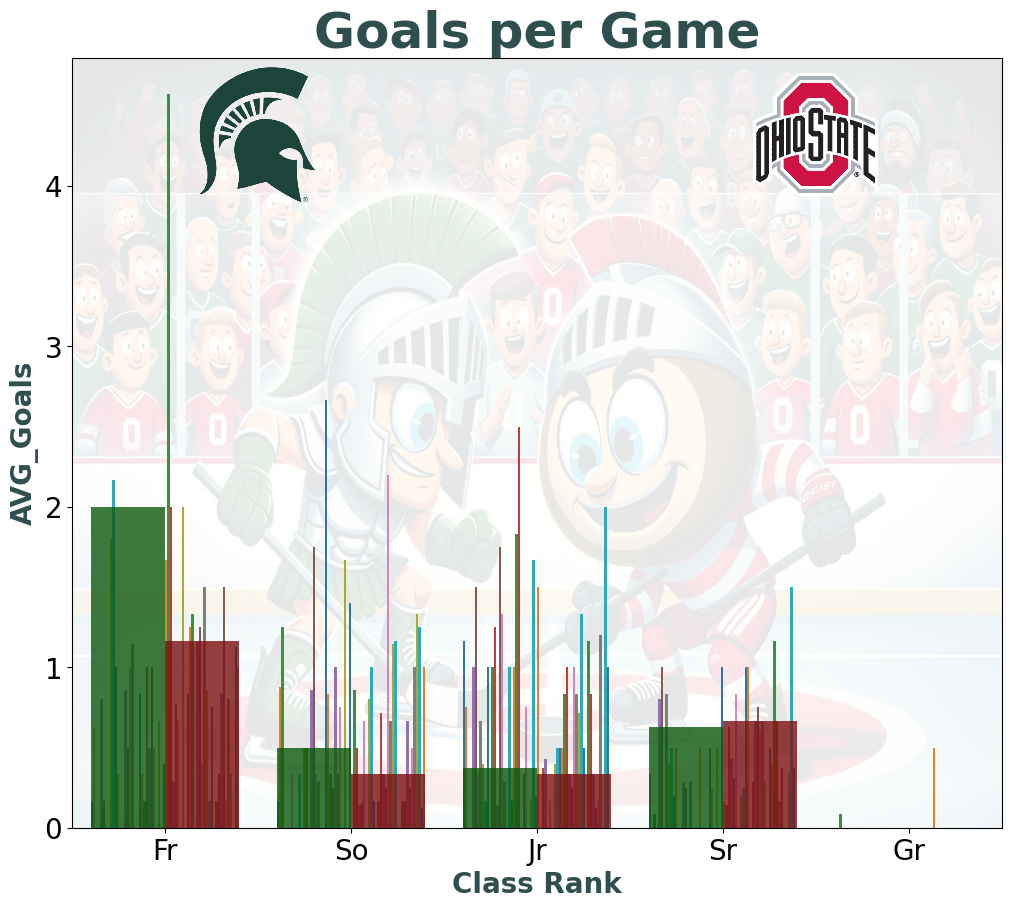

C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_filtered,


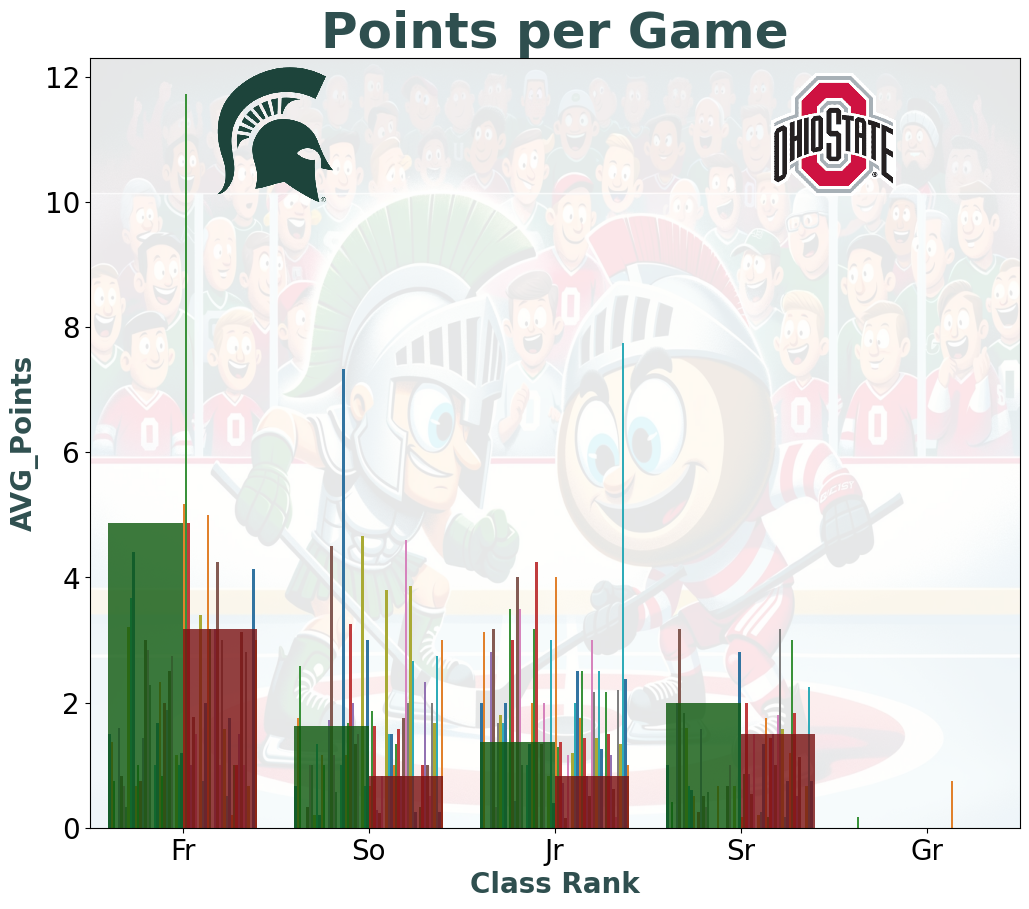

C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_filtered,


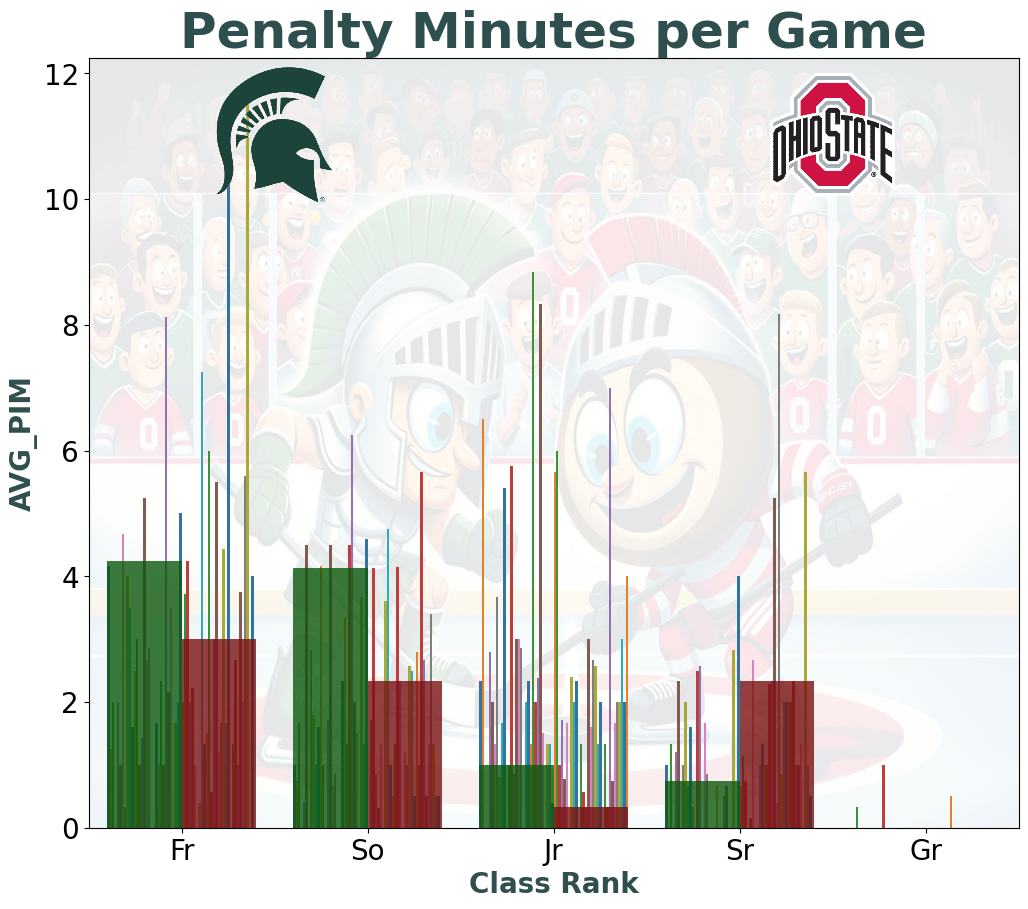

C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df,
C:\Users\Justin\AppData\Local\Temp\ipykernel_1372\3066037128.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_filtered,


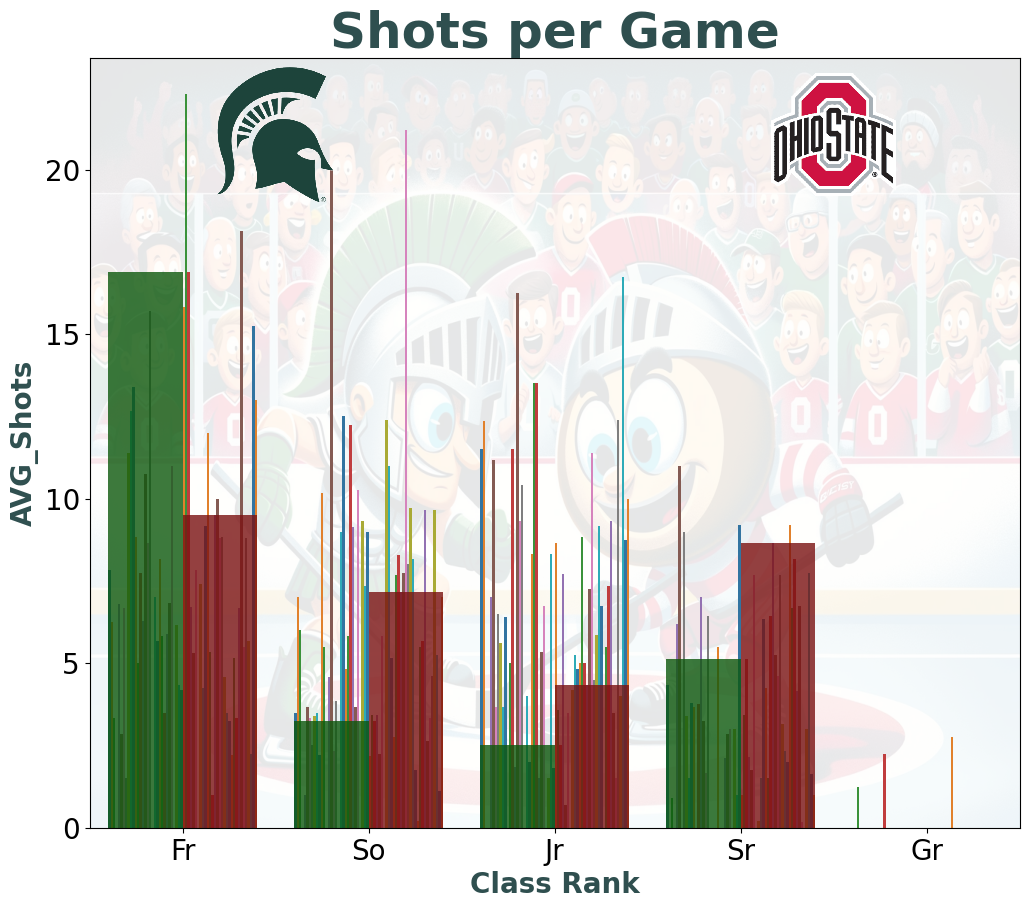

In [17]:
class_rank_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Function to create individual plots for each metric
def create_metric_plot(metric, title, bg_img, alpha_value=alpha_value):
    fig, ax = plt.subplots(figsize=figure_size)
    

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)
    
    # Get the x and y limits after plotting the data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Plot background image with updated extent
    plt.imshow(bg_img, aspect='auto', 
               extent=[x_min, x_max, y_min, y_max], 
               zorder=0, alpha=alpha_value)

    # Plot data for all teams using the 'tab10' palette
    sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df, 
                palette='tab10', ax=ax, ci=None, order=class_rank_order)

    # Overlay larger, more opaque bars for Michigan State and Boston College
    sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_filtered, 
                palette=team_colors, ax=ax, ci=None, alpha=0.8, order=class_rank_order)

    # Add labels and title
    ax.set_xlabel('Class Rank', fontsize=14)
    ax.set_ylabel(title, fontsize=14)

    # Simplify the legend to only show Michigan State and Boston College
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for Michigan State and Boston College
    ax.legend(handles[-2:], labels[-2:], title='Team', fontsize='large', title_fontsize='28',
              # adjust the other font sizes
              labelspacing=1.5,  # increase spacing between items in the legend)
                borderpad=1,  # increase the spacing between the legend and the border
                # framealpha=1,  # increase transparency of the legend
                # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot                
    )

    

    

    
    ## Apply the font parameters to the plot
    plt.title(title, font_title_param)
    plt.xlabel('Class Rank', font_label_large_param)
    plt.ylabel(metric, font_label_large_param)
    # Apply Large font to tick labels
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # # # Drop Legend if there is any
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Place logos at upper corners
    place_logo(logo_folder + team_1_logo, (0.20, 0.90), ax)  # Upper left corner
    place_logo(logo_folder + team_2_logo, (0.80, 0.90), ax)  # Upper right corner


    # # Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
    # TEMP_FOLDER = '../TEMP/'
    # plt.savefig(f'{TEMP_FOLDER}/images/OVERALL_{title}.png', bbox_inches='tight')
    

    # Show the plot
    plt.show()

# Create plots for Goals, Assists, PIM, and Shots
create_metric_plot('AVG_Goals', 'Goals per Game', bg_img, alpha_value)

create_metric_plot('AVG_Points', 'Points per Game', bg_img, alpha_value)
create_metric_plot('AVG_PIM', 'Penalty Minutes per Game', bg_img, alpha_value)
create_metric_plot('AVG_Shots', 'Shots per Game', bg_img, alpha_value)

## Stat Breakdown By Position

In [21]:


by_position_stats_df = pd.read_sql("""
SELECT
    mr.Yr,
    ps.Team,
    COALESCE(SUM(ps.G), 0) AS Total_Goals,
    COALESCE(SUM(ps.A), 0) AS Total_Assists,
    COALESCE(SUM(ps.Sh), 0) AS Total_Shots,
    COALESCE(SUM(ps.G) + SUM(ps.A), 0) AS Total_Points,
    COALESCE(SUM(ps.PIM), 0) AS Total_PIM,
    mr.Position
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.Position, mr.Yr, ps.Team
ORDER BY mr.Position, ps.Team;


""", conn)

final_df_by_position = pd.merge(by_position_stats_df, games_played_count, how='left', on=['Team', 'Position'])

# # # ## Calculate the average stats per class
final_df_by_position['AVG_Goals'] = final_df_by_position['Total_Goals'] / final_df_by_position['Num_Games']
final_df_by_position['AVG_Assists'] = final_df_by_position['Total_Assists'] / final_df_by_position['Num_Games']
final_df_by_position['AVG_Points'] = final_df_by_position['Total_Points'] / final_df_by_position['Num_Games']
final_df_by_position['AVG_PIM'] = final_df_by_position['Total_PIM'] / final_df_by_position['Num_Games']
final_df_by_position['AVG_Shots'] = final_df_by_position['Total_Shots'] / final_df_by_position['Num_Games']


# final_df.head(20)

# Filter to Just the highlighted teams
final_df_filtered = final_df_by_position[(final_df_by_position['Team'] == team_1) | (final_df_by_position['Team'] == team_2)]

def create_metric_plot_2(metric, title, bg_img, alpha_value=alpha_value):
    fig, ax = plt.subplots(figsize=figure_size)
    

    ax.set_xlabel('Position', fontsize=14)  # Changed from 'Class Rank'
    sns.barplot(x='Position', y=metric, hue='Team', data=final_df_by_position, 
                palette='tab10', ax=ax, ci=None, order=position_order or sorted(final_df_by_position['Position'].unique()))

    
    # Get the x and y limits after plotting the data
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    # Plot background image with updated extent
    plt.imshow(bg_img, aspect='auto', 
               extent=[x_min, x_max, y_min, y_max], 
               zorder=0, alpha=alpha_value)

    # # Plot data for all teams using the 'tab10' palette
    # sns.barplot(x='Yr.', y=metric, hue='Team', data=final_df_by_position, 
    #             palette='tab10', ax=ax, ci=None, order=position_order)

    # Overlay larger, more opaque bars for The Highlighted Teams
    sns.barplot(x='Position', y=metric, hue='Team', data=final_df_filtered, 
                palette=team_colors, ax=ax, ci=None, alpha=0.8, order=position_order)

    # Add labels and title
    ax.set_xlabel('Position', fontsize=14)  # Changed from 'Class Rank'
    ax.set_ylabel(title, fontsize=14)

    # Simplify the legend to only show The Highlighted Teams
    handles, labels = ax.get_legend_handles_labels()
    # Only keep the last two handles for The Highlighted Teams
    ax.legend(handles[-2:], labels[-2:], title='Team', fontsize='large', title_fontsize='28',
              # adjust the other font sizes
              labelspacing=1.5,  # increase spacing between items in the legend)
                borderpad=1,  # increase the spacing between the legend and the border
                # framealpha=1,  # increase transparency of the legend
                # bbox_to_anchor=(1.05, 1),  # move the legend to the right of the plot                
    )


## Call the function to create the plots
create_metric_plot_2('AVG_Goals', 'Goals per Game', bg_img, alpha_value)
create_metric_plot_2('AVG_Points', 'Points per Game', bg_img, alpha_value)
create_metric_plot_2('AVG_PIM', 'Penalty Minutes per Game', bg_img, alpha_value)
create_metric_plot_2('AVG_Shots', 'Shots per Game', bg_img, alpha_value)


DatabaseError: Execution failed on sql '
SELECT
    mr.Yr,
    ps.Team,
    COALESCE(SUM(ps.G), 0) AS Total_Goals,
    COALESCE(SUM(ps.A), 0) AS Total_Assists,
    COALESCE(SUM(ps.Sh), 0) AS Total_Shots,
    COALESCE(SUM(ps.G) + SUM(ps.A), 0) AS Total_Points,
    COALESCE(SUM(ps.PIM), 0) AS Total_PIM,
    mr.Position
FROM master_roster AS mr
LEFT JOIN player_stats_ytd AS ps ON mr.Clean_Name = ps.Clean_Player
GROUP BY mr.Position, mr.Yr, ps.Team
ORDER BY mr.Position, ps.Team;


': no such column: mr.Yr